# [**Perfect Sum**](https://practice.geeksforgeeks.org/problems/perfect-sum-problem5633/1)

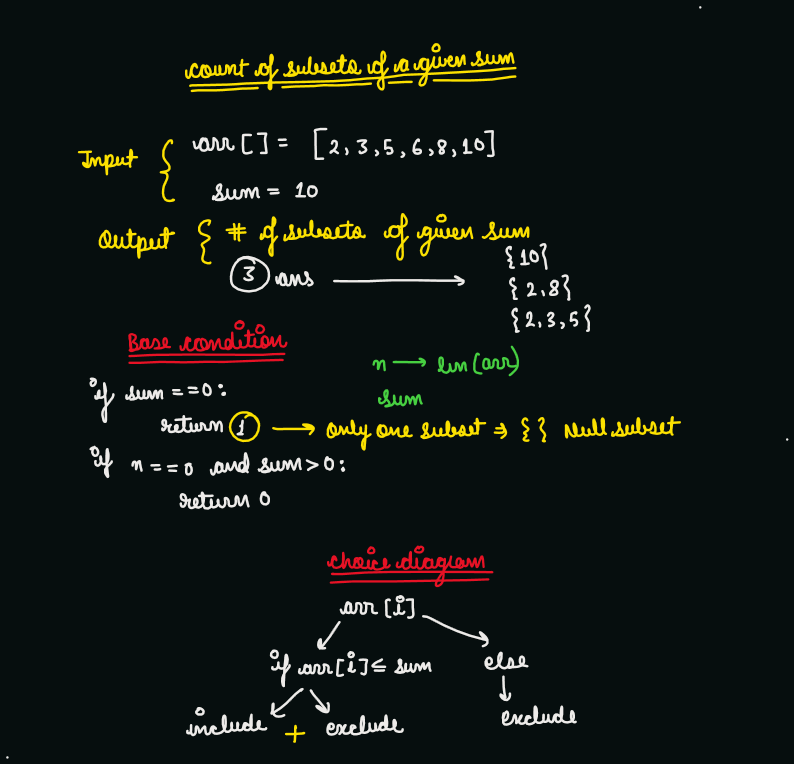

# Recursive

In [1]:
#User function Template for python3
class Solution:
    def perfectSum(self, arr, n, s):
        if s==0:
            return 1
        if n==0 and s>0:
            return 0
        
        if arr[n-1]>s:
            return self.perfectSum(arr, n-1, s)
        else:
            return self.perfectSum(arr, n-1, s)+self.perfectSum(arr, n-1, s-arr[n-1])
        

s= Solution()

In [16]:
#User function Template for python3
class Solution:
    
    def perfectSum(self, arr, n, s, isFirst=True):
        if isFirst:
            # if there are zeroes, then settle them to the start of the array
            arr.sort(reverse=True)
            self.t= [[-1 for i in range(s+1)] for j in range(n+1)]
        if s==0:
            return 1
        if n==0 and s>0:
            return 0
        

        if self.t[n][s]!=-1:
            return self.t[n][s]
        

        # print(n,s)
        if arr[n-1]>s:
            self.t[n][s]=  self.perfectSum(arr, n-1, s, isFirst=False)
            return self.t[n][s]
        else:
            self.t[n][s]= self.perfectSum(arr, n-1, s, isFirst=False)+ self.perfectSum(arr, n-1, s-arr[n-1], isFirst=False)
            return self.t[n][s] %  (10**9+7)
        

s= Solution()

# Memoization

In [13]:
#User function Template for python3
class Solution:
    def init_t(self, n, sum):
        self.t= [[-1 for i in range(sum+1)]for i in range(n+1)]
    
    def perfectSum(self, arr, n, sum, set_zero=True):
        # code here
        modulo= 10**9 +7
        if set_zero:
            arr.sort(reverse=True) # bring zeroes to the end 
            self.init_t(n, sum)
        set_zero=False
        if sum==0:
            return 1
        if sum!=0 and n==0:
            return 0
        current_value= arr[n-1]
        if self.t[n][sum]!=-1:
            return self.t[n][sum]

        if current_value<=sum:
            current_value_included= self.perfectSum(arr, n-1, sum-current_value, set_zero) 
            current_value_excluded= self.perfectSum(arr, n-1, sum, set_zero) 
            self.t[n][sum]=(current_value_included+current_value_excluded)%modulo
            return self.t[n][sum]
        self.t[n][sum]= (self.perfectSum(arr, n-1, sum, set_zero) )%modulo
        return self.t[n][sum]
    
s= Solution()

# Bottom Up

In [22]:
#User function Template for python3
class Solution:
    
    def perfectSum(self, arr, n, s, isFirst=True):
        if isFirst:
            # if there are zeroes, then settle them to the start of the array
            arr.sort(reverse=True)
            self.t= [[0 for i in range(s+1)] for j in range(n+1)]
        # if s==0:
        #     return 1
        # if n==0 and s>0:
        #     return 0

        for i in range(n+1):
            for j in range(s+1):
                if j==0:
                    self.t[i][j]=1

        

        # # print(n,s)
        # if arr[n-1]>s:
        #     self.t[n][s]=  self.perfectSum(arr, n-1, s, isFirst=False)
        #     return self.t[n][s]
        # else:
        #     self.t[n][s]= self.perfectSum(arr, n-1, s, isFirst=False)+ self.perfectSum(arr, n-1, s-arr[n-1], isFirst=False)
        #     return self.t[n][s] %  (10**9+7)

        for i in range(1, n+1):
            for j in range(1, s+1):
                # i--->n
                # j--->s
                if arr[i-1]>j:
                    self.t[i][j]= self.t[i-1][j]
                else:
                    self.t[i][j]= self.t[i-1][j]+self.t[i-1][j-arr[i-1]]
        return self.t[-1][-1] % (1000000007)
        

s= Solution()

In [23]:
n, S= 10, 31
arr= [9, 7, 0, 3, 9, 8, 6, 5, 7, 6] 


# corner case because if 0 in array , it can be counted in subset 


s.perfectSum(arr, n, S)

40

In [21]:
for i in s.t:
    print(i)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 4, 2, 1, 0, 0, 0, 1, 2, 4, 2, 1, 0, 0, 0, 0, 2]
[1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 4, 4, 2, 1, 0, 1, 2, 5, 4, 5, 2, 1, 0, 1, 2, 4, 4]
[1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 4, 3, 6, 4, 2, 1, 2, 3, 6, 9, 6, 6, 2, 2, 2, 6, 6, 9, 6]
[1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 3, 5, 5, 6, 4, 3, 5, 5, 9, 10, 11, 7, 8, 5, 8, 11, 12, 12, 11, 8]
[1, 0, 0, 1, 0, 1, 2, 2, 2, 4, 2, 3, 5, 5, 7, 9, 9, 8, 11, 9, 12, 15, 16, 16, 18, 16, 15, 19, 17, 20, 22, 20]
[1, 0, 0, 2